In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [3]:
df = pd.read_csv("AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



In [5]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

<ipython-input-5-12b5a7c107c6>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


In [6]:
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

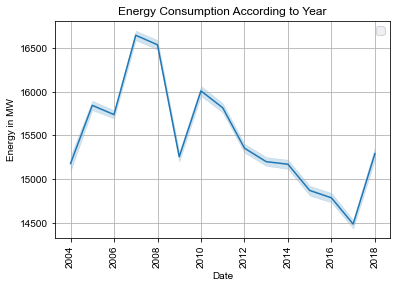

In [7]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

No handles with labels found to put in legend.


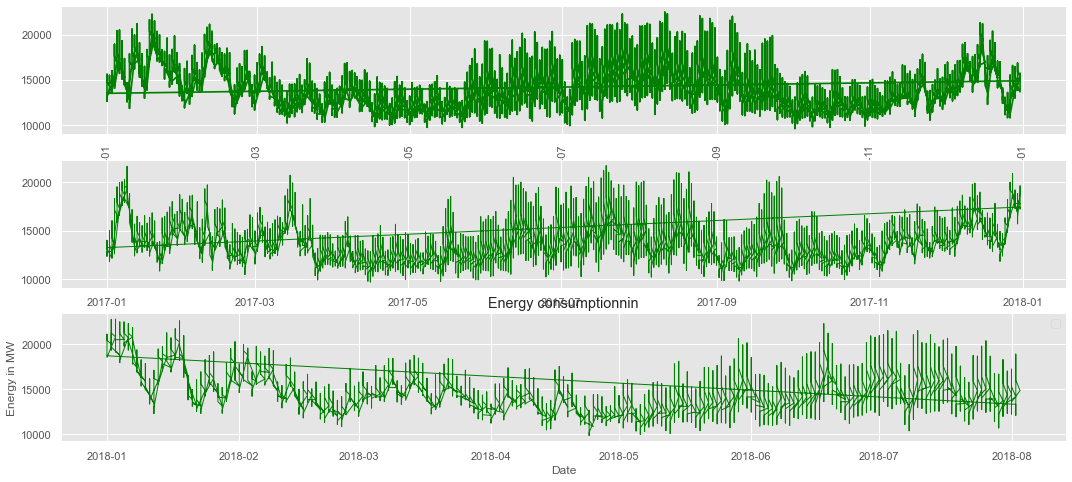

In [11]:
from matplotlib import style

fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2016 = dataset.loc["2016", "AEP_MW"].to_list()
x_2016 = dataset.loc["2016", "Date"].to_list()
ax1.plot(x_2016,y_2016, color="green", linewidth=1.7)


y_2017 = dataset.loc["2017", "AEP_MW"].to_list()
x_2017 = dataset.loc["2017", "Date"].to_list()
ax2.plot(x_2017, y_2017, color="green", linewidth=1)

y_2018 = dataset.loc["2018", "AEP_MW"].to_list()
x_2018 = dataset.loc["2018", "Date"].to_list()
ax3.plot(x_2018, y_2018, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

C:\Users\ibrahim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ennergy Distribution')

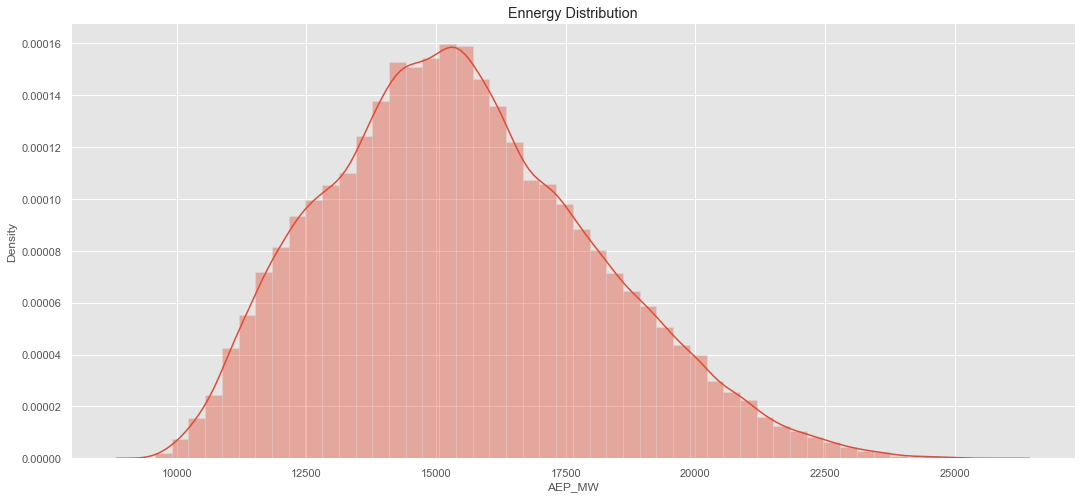

In [12]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")

TypeError: float() argument must be a string or a number, not 'datetime.time'

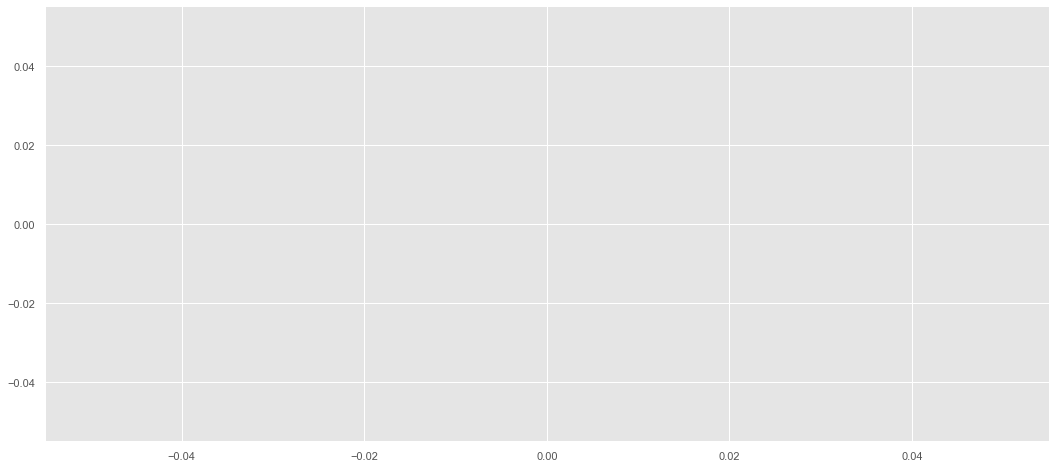

In [19]:

fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.lineplot(x='Time', y='AEP_MW', data=dataset, ax=ax1)

plt.title("Energy Consumption vs Time")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

plt.show()

In [20]:
NewDataSet = dataset.resample('D').mean()

In [21]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 8)
New  Dataset  (5055, 4)


In [22]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [23]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [28]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [29]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

In [39]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [40]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)


Epoch 1/50
155/155 [==============================] - 31s 108ms/step - loss: 0.0230
Epoch 2/50
155/155 [==============================] - 16s 103ms/step - loss: 0.0185
Epoch 3/50
155/155 [==============================] - 17s 111ms/step - loss: 0.0172
Epoch 4/50
155/155 [==============================] - 17s 108ms/step - loss: 0.0168
Epoch 5/50
155/155 [==============================] - 17s 109ms/step - loss: 0.0160
Epoch 6/50
155/155 [==============================] - 17s 107ms/step - loss: 0.0153
Epoch 7/50
155/155 [==============================] - 17s 111ms/step - loss: 0.0154
Epoch 8/50
155/155 [==============================] - 17s 109ms/step - loss: 0.0147
Epoch 9/50
155/155 [==============================] - 17s 108ms/step - loss: 0.0140
Epoch 10/50
155/155 [==============================] - 17s 111ms/step - loss: 0.0121
Epoch 11/50
155/155 [==============================] - 18s 113ms/step - loss: 0.0101
Epoch 12/50
155/155 [==============================] - 17s 111ms/step - lo

In [41]:
TestData.head(2)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4,2018,17
2018-04-27,12964.000000,4,2018,17


In [42]:
TestData.shape

(100, 4)

In [43]:
NewDataSet.shape

(5055, 4)

In [44]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [45]:
Df_Total.shape

(5155, 1)

In [46]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [47]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

4/4 [==============================] - 3s 29ms/step


In [48]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [49]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [50]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13331.136719
1,2018-04-27,12964.000000,12931.283203
2,2018-04-28,12237.583333,14476.599609
3,2018-04-29,12156.791667,13049.565430
4,2018-04-30,13443.500000,12941.436523
...,...,...,...
95,2018-07-30,15368.083333,14838.903320
96,2018-07-31,15180.291667,15678.386719
97,2018-08-01,15151.166667,14865.278320
98,2018-08-02,15687.666667,15052.990234
